In [149]:
import pandas as pd

In [150]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [151]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790


In [152]:
confirmed['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [153]:
confirmed['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martiniq

In [154]:
confirmed.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                   33.9391
Long                    67.71
1/22/20                     0
                     ...     
6/10/21                 85892
6/11/21                 87716
6/12/21                 88740
6/13/21                 89861
6/14/21                 91458
Name: 0, Length: 514, dtype: object

In [155]:
# armazenando a data mais atual (última)
last_date = '6/14/21'

In [156]:
confirmed['Country/Region'].value_counts()

China                    34
Canada                   16
United Kingdom           12
France                   12
Australia                 8
                         ..
Indonesia                 1
Greece                    1
Nigeria                   1
Saint Kitts and Nevis     1
Malaysia                  1
Name: Country/Region, Length: 193, dtype: int64

In [157]:
# valor falso pois o erro é muito grande
# descartaremos esta análise pois tem muito campo vazio (muita disparidade no padrão)
confirmed['Country/Region'].value_counts()

China                    34
Canada                   16
United Kingdom           12
France                   12
Australia                 8
                         ..
Indonesia                 1
Greece                    1
Nigeria                   1
Saint Kitts and Nevis     1
Malaysia                  1
Name: Country/Region, Length: 193, dtype: int64

In [158]:
confirmed_by_country = confirmed.groupby('Country/Region').sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790


In [159]:
confirmed_by_country.loc["China"][2:]

1/22/20       548.0
1/23/20       643.0
1/24/20       920.0
1/25/20      1406.0
1/26/20      2075.0
             ...   
6/10/21    103285.0
6/11/21    103320.0
6/12/21    103357.0
6/13/21    103380.0
6/14/21    103401.0
Name: China, Length: 510, dtype: float64

In [160]:
import matplotlib.pyplot as plt

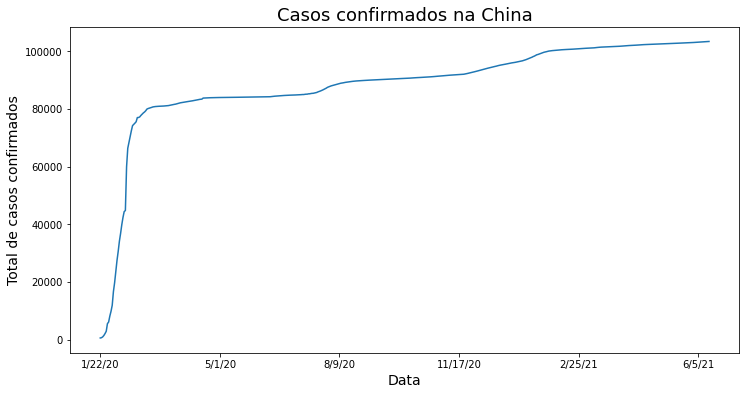

In [161]:
# casos confirmados cumulativos na China
# compara o momento inicial ao momento atual

plt.figure(figsize = (12, 6))
confirmed_by_country.loc["China"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Total de casos confirmados', fontsize = 14)
plt.title('Casos confirmados na China', fontsize = 18)
plt.show()

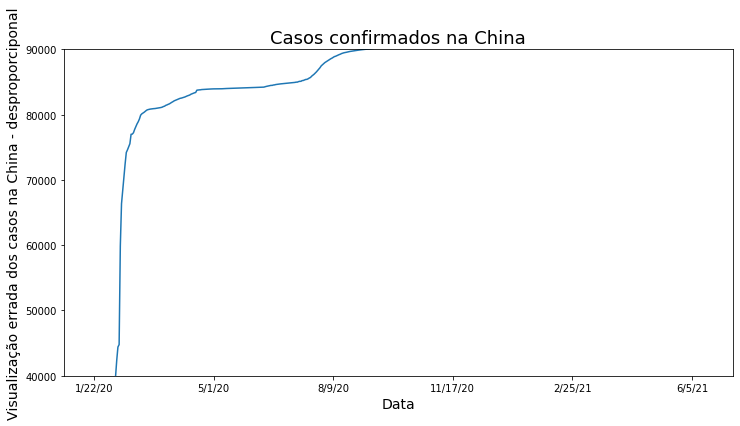

In [162]:
# limitando o eixo y
# mensagem ruim a quem está visualizando o gráfico

plt.figure(figsize = (12, 6))
confirmed_by_country.loc["China"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Visualização errada dos casos na China - desproporciponal', fontsize = 14)
plt.ylim(40000, 90000)
plt.title('Casos confirmados na China', fontsize = 18)
plt.show()

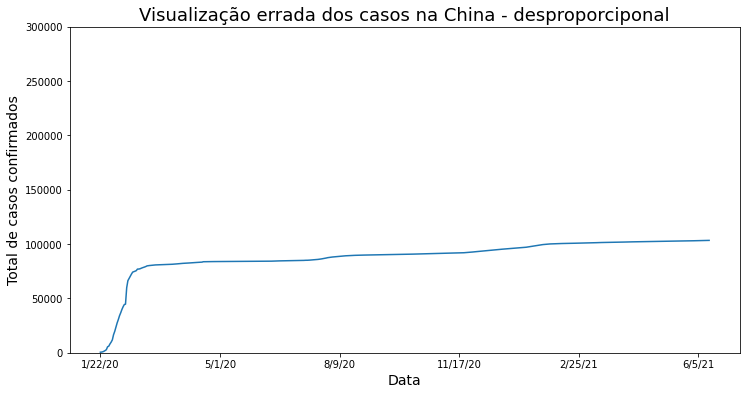

In [163]:
# mensagem ruim a quem está visualizando o gráfico
# compara o momento inicial com 300 mil

plt.figure(figsize = (12, 6))
confirmed_by_country.loc["China"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Total de casos confirmados', fontsize = 14)
plt.ylim(0, 300000)
plt.title('Visualização errada dos casos na China - desproporciponal', fontsize = 18)
plt.show()

In [164]:
# casos confirmados por dia na China
new_cases_china = confirmed_by_country.loc["China"][2:].diff().dropna()

In [165]:
new_cases_china.describe()

count      509.000000
mean       202.068762
std        890.833022
min         -1.000000
25%         19.000000
50%         31.000000
75%         88.000000
max      15136.000000
Name: China, dtype: float64

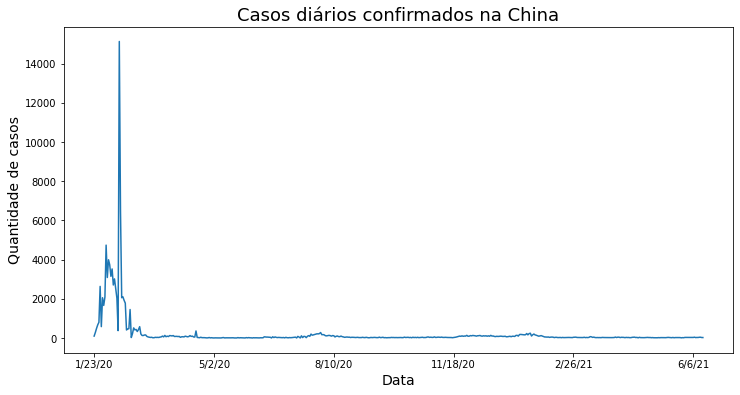

In [166]:
# gráfico dos casos diários na China
plt.figure(figsize = (12, 6))
new_cases_china.plot()

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos diários confirmados na China', fontsize = 18)
plt.show()

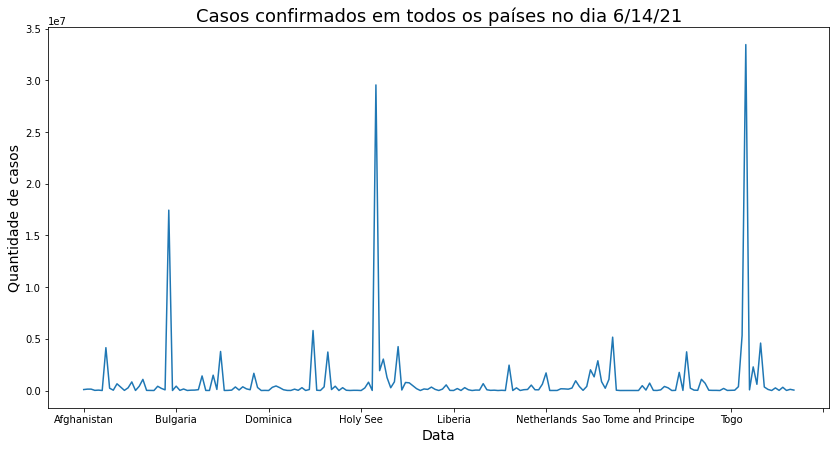

In [167]:
# últimos casos confirmados em cada país
plt.figure(figsize = (14, 7))
confirmed_by_country[last_date].plot()

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

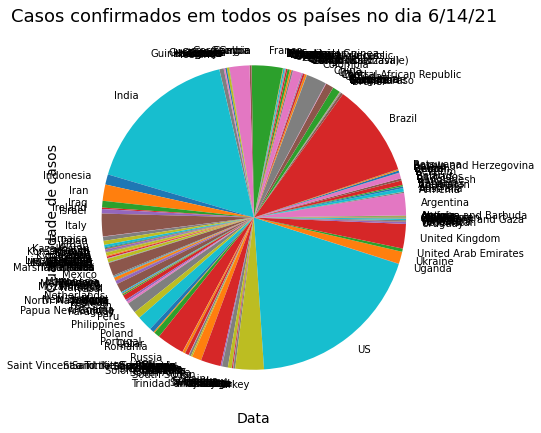

In [168]:
# QUASE SEMPRE DEVEMOS EVITAR GRÁFICO DE PIZZA
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].plot(kind = 'pie')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

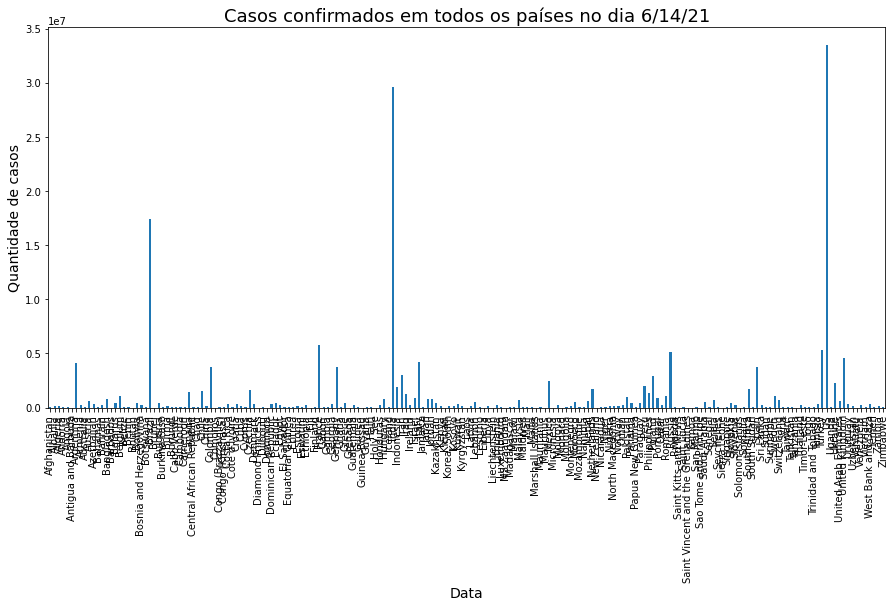

In [169]:
#gráfico de barra
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].plot(kind = 'bar')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

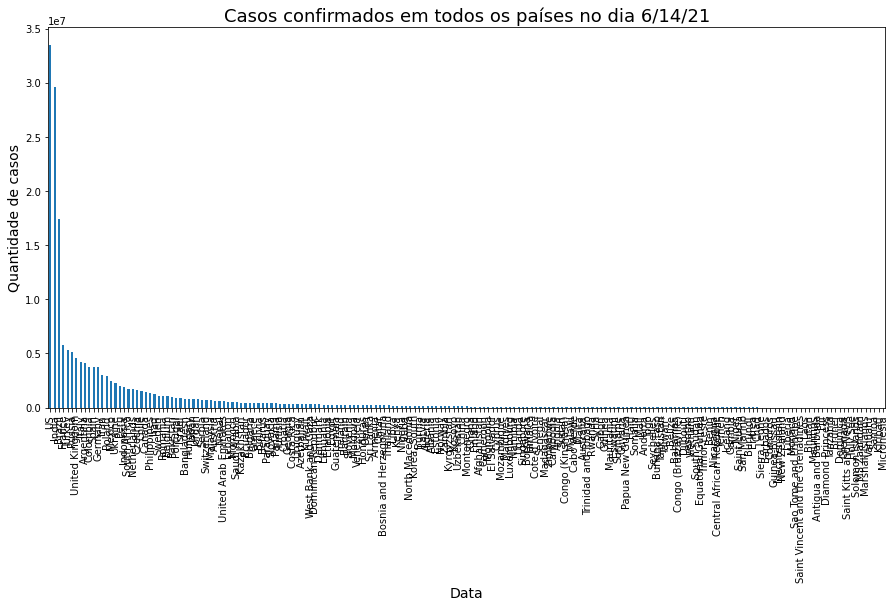

In [170]:
# ordenando os valores
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].sort_values(ascending = False).plot(kind = 'bar')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

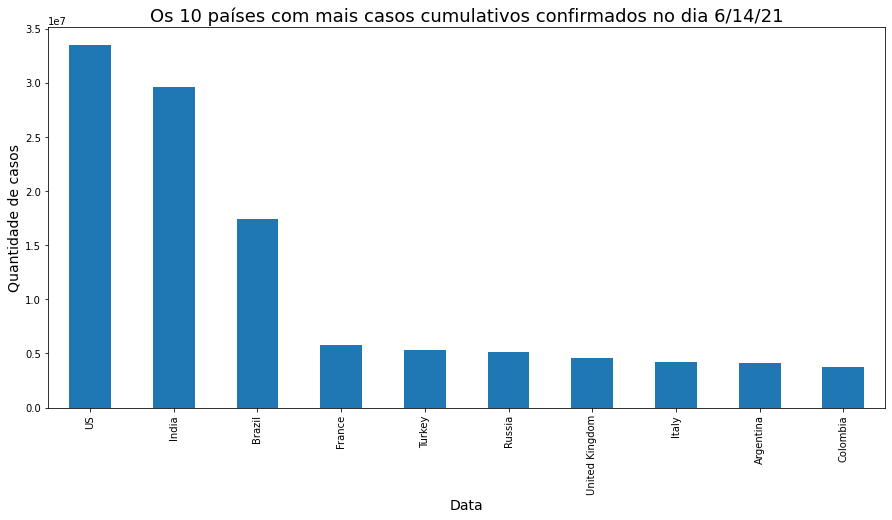

In [171]:
# ordenando os valores
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].sort_values(ascending = False)[0:10].plot(kind = 'bar')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Os 10 países com mais casos cumulativos confirmados no dia {}'.format(last_date), fontsize = 18)
plt.show()

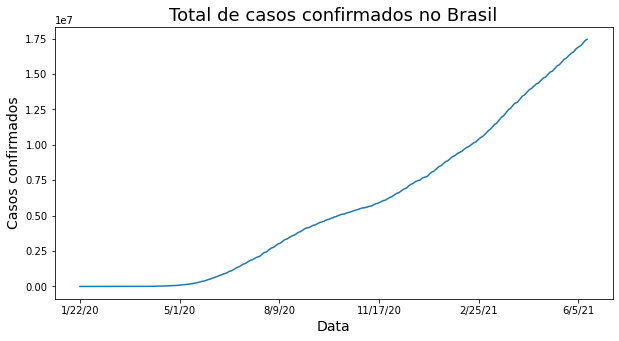

In [172]:
# casos confirmados cumulativos na Brasil
plt.figure(figsize = (10, 5))
confirmed_by_country.loc["Brazil"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Casos confirmados', fontsize = 14)
plt.title('Total de casos confirmados no Brasil', fontsize = 18)
plt.show()

In [173]:
# mortos e recuperados no mundo
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [174]:
# casos de morte e recuperados no mundo
deaths_by_country = deaths.groupby('Country/Region').sum()
recovered_by_country = recovered.groupby('Country/Region').sum()

In [175]:
display(recovered.head())
display(deaths.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53961,54019,54040,54222,54382,54503,54534,54619,54634,54663,54686,55010,55118,55529,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281,57450,57629,57741,57963,58070,58144,58265,58622,58998,59569,59871,60280,60598,60939,61410,61706
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,114362,115253,116126,117089,118041,119061,120072,121122,122105,123081,124312,125419,126405,127240,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215,129308,129431,129473,129521,129566,129598,129627,129664,129702,129736,129761,129785,129807,129826,129842,129865
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86007,86149,86280,86420,86554,86703,86857,87003,87137,87251,87359,87476,87609,87746,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419,89625,89839,90057,90281,90517,90767,90995,91198,91413,91651,91894,92132,92384,92620,92852,93094
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12900,12936,12962,12995,13021,13070,13104,13104,13155,13155,13155,13211,13234,13234,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416,13416,13458,13479,13507,13527,13527,13527,13527,13557,13557,13569,13578,13591,13591,13591,13618
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24503,24698,24713,24717,24772,25145,25187,25629,25650,25703,25715,25995,26013,26458,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646,27766,28079,28190,28264,28646,28802,28866,28880,29329,29368,29553,29960,30101,30207,30282,30359


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2664,2673,2683,2686,2698,2710,2713,2721,2730,2733,2742,2745,2751,2762,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899,2919,2944,2973,3007,3034,3068,3104,3145,3187,3251,3305,3356,3412,3449,3527,3612
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2406,2408,2411,2412,2416,2420,2423,2426,2427,2429,2432,2435,2436,2438,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449,2450,2451,2451,2451,2451,2451,2451,2451,2452,2452,2452,2452,2453,2453,2453,2453
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3307,3315,3321,3328,3335,3343,3350,3355,3360,3366,3374,3381,3388,3395,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460,3465,3472,3480,3490,3497,3504,3510,3518,3527,3537,3544,3552,3560,3565,3571,3579
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,622,628,630,633,636,639,645,649,651,655,659,677,685,696,704,709,715,725,731,735,742,745,749,757,764,766,772,780,784,788,794,797,800,803,811,815,819,825,831,836


In [176]:
# função que retorna a última data agrupada por país
def latest_by_country(data):
  return data.groupby('Country/Region').sum().iloc[:,-1]

display(latest_by_country(confirmed))
display(latest_by_country(deaths))
display(latest_by_country(recovered))

Country/Region
Afghanistan            91458
Albania               132461
Algeria               133742
Andorra                13826
Angola                 36790
                       ...  
Vietnam                10881
West Bank and Gaza    311690
Yemen                   6863
Zambia                113134
Zimbabwe               40077
Name: 6/14/21, Length: 193, dtype: int64

Country/Region
Afghanistan           3612
Albania               2453
Algeria               3579
Andorra                127
Angola                 836
                      ... 
Vietnam                 59
West Bank and Gaza    3539
Yemen                 1350
Zambia                1416
Zimbabwe              1635
Name: 6/14/21, Length: 193, dtype: int64

Country/Region
Afghanistan            61706
Albania               129865
Algeria                93094
Andorra                13618
Angola                 30359
                       ...  
Vietnam                 4236
West Bank and Gaza    304138
Yemen                   3765
Zambia                 98994
Zimbabwe               37027
Name: 6/14/21, Length: 193, dtype: int64

In [177]:
# chamando a função e colocando num DataFrame
informations = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
combined = pd.concat(informations, axis = 1)
combined.columns = ['confirmed', 'deaths', 'recovered']
combined

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,91458,3612,61706
Albania,132461,2453,129865
Algeria,133742,3579,93094
Andorra,13826,127,13618
Angola,36790,836,30359
...,...,...,...
Vietnam,10881,59,4236
West Bank and Gaza,311690,3539,304138
Yemen,6863,1350,3765


## Taxa de letalidade:

In [178]:
# taxa de letalidade expressa em porcentagem %
# muito difícil falar em letalidade de uma doença durante uma pandemia
sum_up = combined.sum()
letality_rate_1 = sum_up['deaths'] / sum_up['confirmed']
letality_rate_2 = sum_up['deaths'] / (sum_up['deaths'] + sum_up['recovered'])
print('A primeira estimativa (otimista) da taxa de letalidade é: {:.3f}%'.format(letality_rate_1 * 100))
print('A segunda estimativa (pessimista) da taxa de letalidade é: {:.3f}%'.format(letality_rate_2 * 100))

A primeira estimativa (otimista) da taxa de letalidade é: 2.163%
A segunda estimativa (pessimista) da taxa de letalidade é: 3.226%


In [179]:
# função que retorna uma data específica agrupada por país
def latest_by_country_at(data, date):
  return data.groupby('Country/Region').sum()[date]

# chamando a função e colocando num DataFrame
informations = [latest_by_country_at(confirmed, '2/20/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(informations, axis = 1)
combined_2_20_20.columns = ['confirmed', 'deaths', 'recovered']


# taxa de letalidade expressa em porcentagem %
# muito difícil falar em letalidade de uma doença durante uma pandemia
sum_up = combined_2_20_20.sum()
letality_rate_1 = sum_up['deaths'] / sum_up['confirmed']
letality_rate_2 = sum_up['deaths'] / (sum_up['deaths'] + sum_up['recovered'])
print('A primeira estimativa (otimista) da taxa de letalidade é: {:.3f}%'.format(letality_rate_1 * 100))
print('A segunda estimativa (pessimista) da taxa de letalidade é: {:.3f}%'.format(letality_rate_2 * 100))


A primeira estimativa (otimista) da taxa de letalidade é: 2.950%
A segunda estimativa (pessimista) da taxa de letalidade é: 11.005%


In [180]:
# usando uma data anterior de confirmados como referência
def latest_by_country_at(data, date):
  return data.groupby('Country/Region').sum()[date]

# chamando a função e colocando num DataFrame: DATA ANTERIOR
informations = [latest_by_country_at(confirmed, '2/8/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_12 = pd.concat(informations, axis = 1)
combined_12.columns = ['confirmed', 'deaths', 'recovered']


# taxa de letalidade expressa em porcentagem %
# muito difícil falar em letalidade de uma doença durante uma pandemia
sum_up = combined_12.loc['China']
letality_rate_3 = sum_up['deaths'] / sum_up['confirmed']
print('A primeira estimativa (otimista) da taxa de letalidade é: {:.3f}%'.format(letality_rate_3 * 100))
display(sum_up)

A primeira estimativa (otimista) da taxa de letalidade é: 6.079%


confirmed    36814
deaths        2238
recovered    18014
Name: China, dtype: int64

In [181]:
# letalidade por país
letality_rate_1 = combined['deaths'] / combined['confirmed']
letality_rate_2 = combined['deaths'] / (combined['deaths'] + combined['recovered'])
combined['letality_rate_1'] = letality_rate_1
combined['letality_rate_2'] = letality_rate_2
combined.head()

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,91458,3612,61706,0.039494,0.055299
Albania,132461,2453,129865,0.018519,0.018539
Algeria,133742,3579,93094,0.026760,0.037022
Andorra,13826,127,13618,0.009186,0.009240
Angola,36790,836,30359,0.022724,0.026799


In [182]:
# ordenando por taxa de  letalidade
combined.sort_values('letality_rate_1', ascending = False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Vanuatu,4,1,3,0.250000,0.250000
MS Zaandam,9,2,7,0.222222,0.222222
Yemen,6863,1350,3765,0.196707,0.263930
Peru,2003625,188708,1962124,0.094183,0.087737
Mexico,2455351,230187,1956575,0.093749,0.105264
Sudan,36304,2732,29994,0.075253,0.083481
Syria,24860,1815,21682,0.073009,0.077244
Egypt,273795,15654,201739,0.057174,0.072008
Somalia,14817,774,7043,0.052237,0.099015


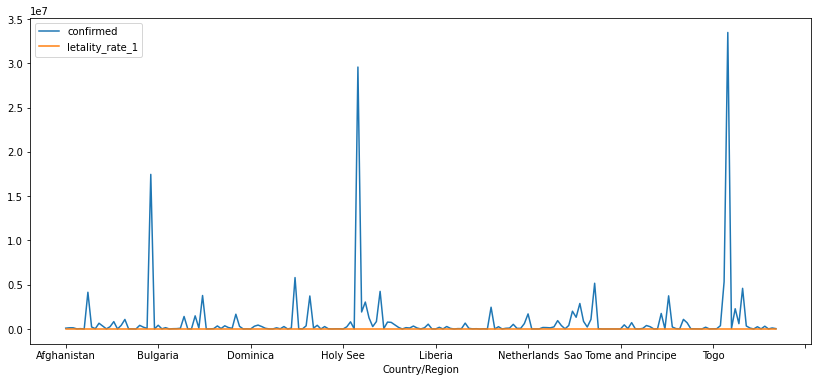

In [183]:
# péssima forma de visualizar, casos confirmados >>> taxa de letalidade (quase 0)
combined[['confirmed', 'letality_rate_1']].plot(figsize = (14, 6))

In [184]:
import seaborn as sns

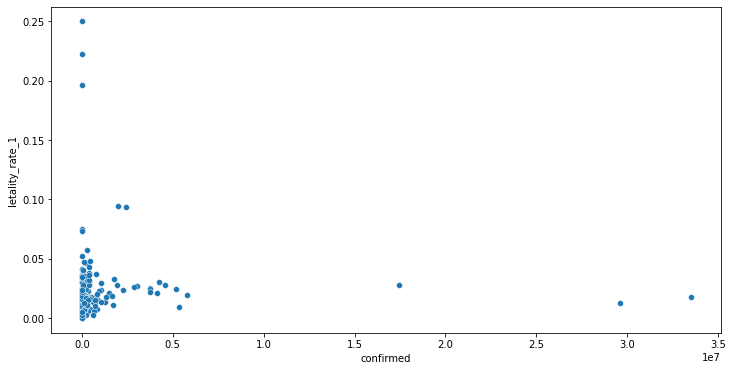

In [185]:
# scatterplot
plt.figure(figsize = (12, 6))
sns.scatterplot(data = combined, x = 'confirmed', y = 'letality_rate_1')

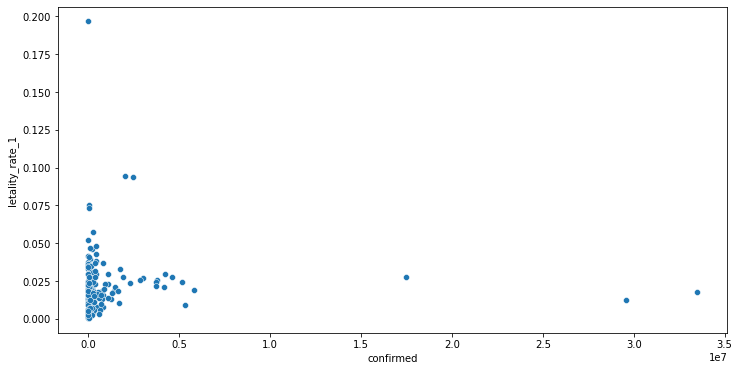

In [186]:
# apenas os países com mais de 40 casos confirmados
plt.figure(figsize = (12, 6))
sns.scatterplot(data = combined.query('confirmed > 500'), x = 'confirmed', y = 'letality_rate_1')

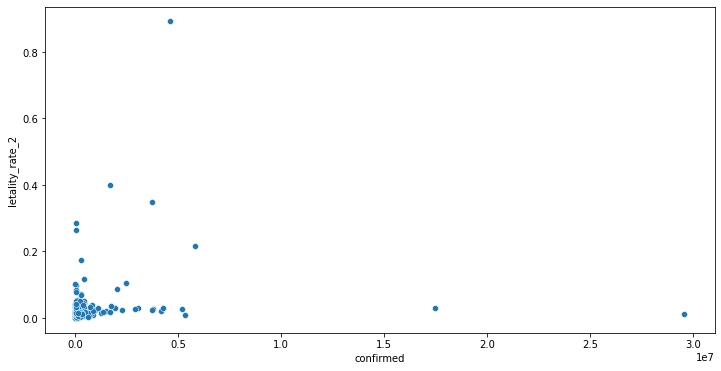

In [187]:
# letality_rate_2
plt.figure(figsize = (12, 6))
sns.scatterplot(data = combined.query('recovered > 40'), x = 'confirmed', y = 'letality_rate_2')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


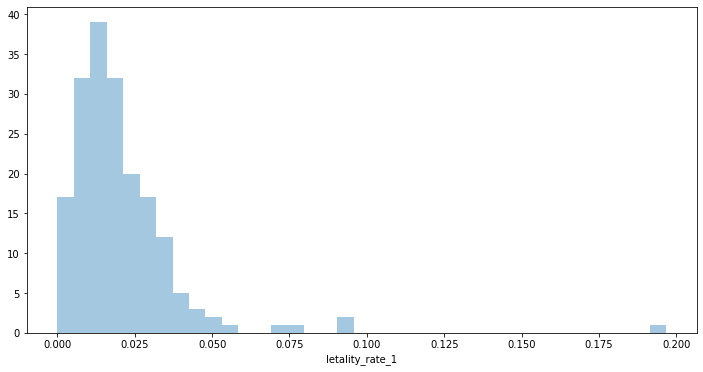

In [188]:
# distribuição
plt.figure(figsize = (12, 6))
sns.distplot(combined.query('confirmed > 40')['letality_rate_1'], kde = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


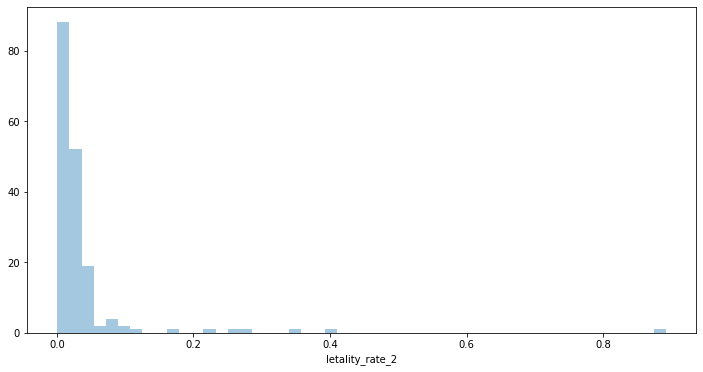

In [189]:
# distribuição
plt.figure(figsize = (12, 6))
sns.distplot(combined.query('recovered > 500')['letality_rate_2'], kde = False)

In [190]:
combined.sort_values('letality_rate_1', ascending = False).query('confirmed > 40').head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Yemen,6863,1350,3765,0.196707,0.263930
Peru,2003625,188708,1962124,0.094183,0.087737
Mexico,2455351,230187,1956575,0.093749,0.105264
Sudan,36304,2732,29994,0.075253,0.083481
Syria,24860,1815,21682,0.073009,0.077244
Egypt,273795,15654,201739,0.057174,0.072008
Somalia,14817,774,7043,0.052237,0.099015
Ecuador,439139,21051,398645,0.047937,0.050158
China,103401,4846,98003,0.046866,0.047118


# Segunda Parte

In [191]:
# selecionando apenas a China
confirmed.set_index('Country/Region').loc['China'].sum().tail()

6/10/21    103285
6/11/21    103320
6/12/21    103357
6/13/21    103380
6/14/21    103401
dtype: object

In [192]:
# selecionando se é China
is_china = confirmed['Country/Region'] == 'China'
is_china.head()

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

In [193]:
# adicionando coluna 'is_china' ao DF
confirmed['is_china'] = is_china
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,is_china
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,False


In [194]:
# query para selecionar apenas a China
confirmed.query('is_china').head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,is_china
58,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,994,994,994,994,994,994,996,999,999,1001,1001,1001,1001,1001,1001,1002,1002,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,True
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1058,1058,1058,1058,1059,1059,1059,1059,1059,1059,1059,1060,1061,1063,1064,1064,1065,1067,1067,1068,1069,1069,1070,1071,True
60,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,597,597,597,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,True
61,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,595,595,595,597,597,597,598,598,598,598,599,599,599,610,610,612,613,615,616,617,617,618,620,621,621,624,625,625,628,629,629,631,632,632,635,636,637,637,638,True
62,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,True


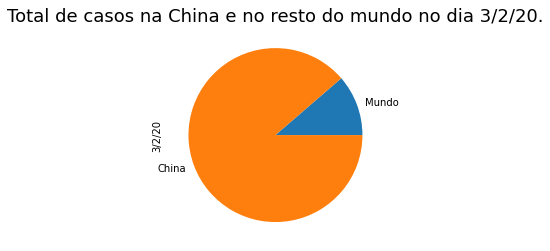

In [195]:
# plot no dia que foi gravao o curso
confirmed.groupby('is_china').sum()['3/2/20'].plot(kind = 'pie', labels = ['Mundo', 'China'])
plt.title('Total de casos na China e no resto do mundo no dia 3/2/20.', fontsize = 18)
plt.show()

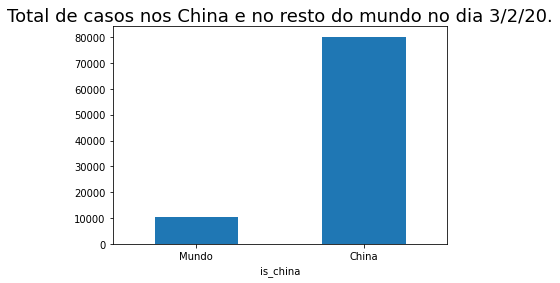

In [196]:
# plotando apenas para Chinia ou não
confirmed.groupby('is_china').sum()['3/2/20'].plot(kind = 'bar')
plt.title('Total de casos nos China e no resto do mundo no dia {}.'.format('3/2/20'), fontsize = 18)
plt.xticks([False, True], ['Mundo', 'China'], rotation = 0)
plt.show()

Text(0.5, 1.0, 'Total de casos nos China e no resto do mundo no dia 6/14/21.')

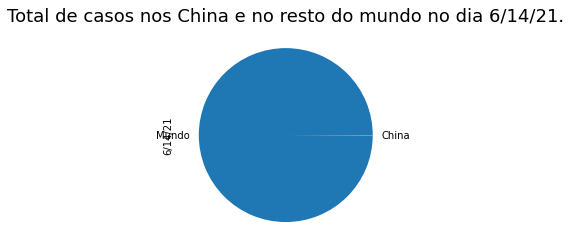

In [197]:
# plot no dia que foi gravao o curso
confirmed.groupby('is_china').sum()[last_date].plot(kind = 'pie', labels = ['Mundo', 'China'])
plt.title('Total de casos nos China e no resto do mundo no dia {}.'.format(last_date), fontsize = 18)

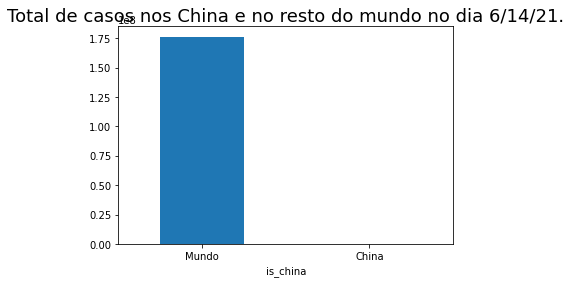

In [198]:
# plotando apenas para Chinia ou não
confirmed.groupby('is_china').sum()[last_date].plot(kind = 'bar')
plt.title('Total de casos nos China e no resto do mundo no dia {}.'.format(last_date), fontsize = 18)
plt.xticks([False, True], ['Mundo', 'China'], rotation = 0)
plt.show()

In [199]:
# selecionando se é US
is_us = confirmed['Country/Region'] == 'US'
confirmed['is_us'] = is_us
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,is_china,is_us
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,False,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,False,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,False,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,False,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,False,False


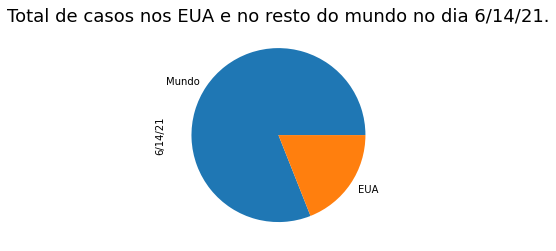

In [200]:
# plotando apenas para US ou não
confirmed.groupby('is_us').sum()[last_date].plot(kind = 'pie', labels = ['Mundo', 'EUA'])
plt.title('Total de casos nos EUA e no resto do mundo no dia {}.'.format(last_date), fontsize = 18)

plt.show()


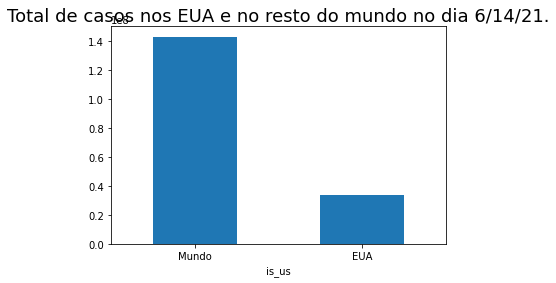

In [201]:
# plotando apenas para US ou não
confirmed.groupby('is_us').sum()[last_date].plot(kind = 'bar')
plt.title('Total de casos nos EUA e no resto do mundo no dia {}.'.format(last_date), fontsize = 18)
plt.xticks([False, True], ['Mundo', 'EUA'], rotation = 0)
plt.show()


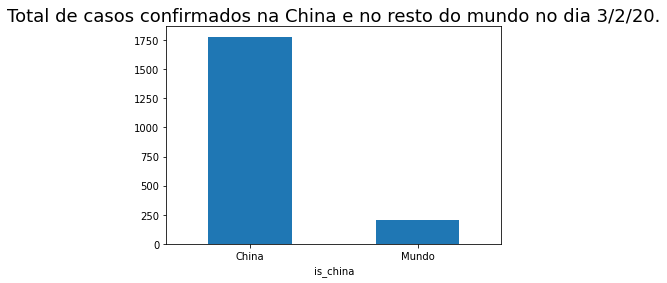

In [220]:
# crescimento do dia 3/1/20 ao dia 3/2/20 na China e no mundo
summed = confirmed.groupby('is_china').sum()
summed['delta'] = summed['3/2/20'] - summed['3/1/20']
summed['delta'].plot(kind = 'bar')
plt.title('Total de casos confirmados na China e no resto do mundo no dia 3/2/20.', fontsize = 18)
plt.xticks([False, True], ['China', 'Mundo'], rotation = 0)
plt.show()

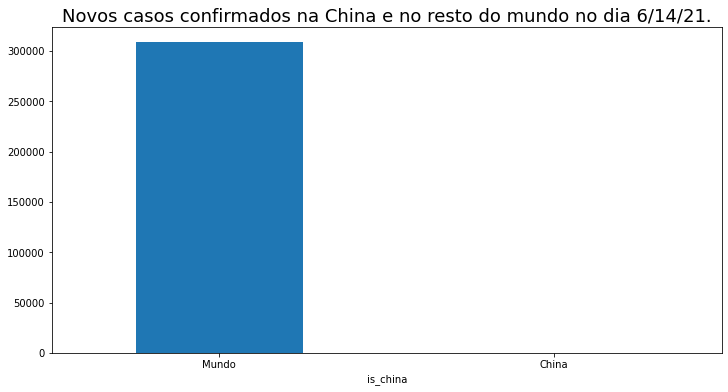

In [203]:
# crescimento do dia 6/13/21 ao dia 6/14/21 na China e no mundo
summed_atual = confirmed.groupby('is_china').sum()
summed_atual['delta_1'] = summed['6/14/21'] - summed['6/13/21']
summed_atual['delta_1'].plot(kind = 'bar', figsize = (12, 6))
plt.title('Novos casos confirmados na China e no resto do mundo no dia 6/14/21.', fontsize = 18)
plt.xticks([False, True], ['Mundo', 'China'], rotation = 0)
plt.show()

In [208]:
# DF summed transposto
summed.T.head()

is_china,False,True
Lat,4517.338850,1085.2923
Long,2429.011414,3688.9377
1/22/20,9.000000,548.0000
1/23/20,12.000000,643.0000
1/24/20,21.000000,920.0000


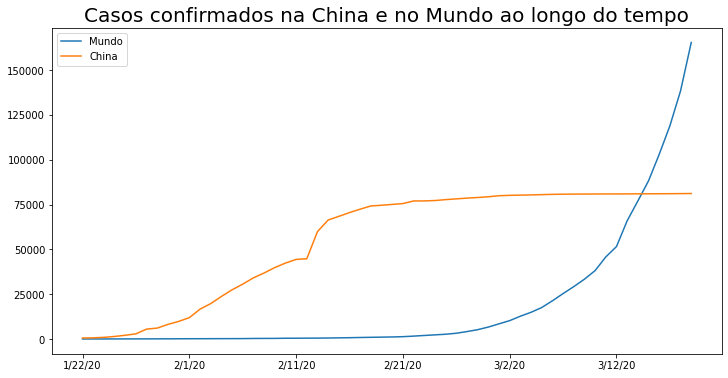

In [205]:
# crescimento no mundo e na china
summed.T[2:60].plot(figsize = (12, 6))   # limitando o gráfico
plt.legend(['Mundo', 'China'])
plt.title('Casos confirmados na China e no Mundo ao longo do tempo', fontsize = 20)
plt.show()

In [218]:
# diferença excluindo [latitude, longitude] : [is_us e delta] 
differences = summed.T[2:60].diff()  # no curso filtra [2:-2]
differences.head()

is_china,False,True
1/22/20,NaN,NaN
1/23/20,3.0,95.0
1/24/20,9.0,277.0
1/25/20,6.0,486.0
1/26/20,16.0,669.0


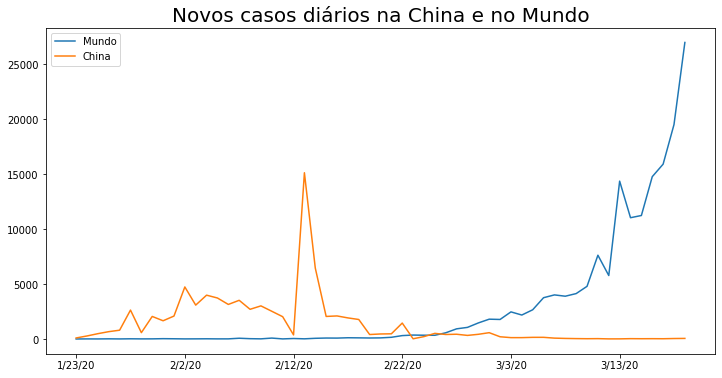

In [217]:
# gráfico dos casos novos
differences.dropna().plot(figsize = (12, 6))  # dropna() para retirar os nulos
plt.title('Novos casos diários na China e no Mundo', fontsize = 20)
plt.legend(['Mundo', 'China'])
plt.show()

In [227]:
# taxa de incidência calculada no dia 3/2/20
# maneira ERRADA de calcular, pois estamos usando toda a população da China
cases = confirmed.groupby('is_china').sum()['3/2/20'].loc[True]
estimated_population = 1437525528
incidence_ratio = cases / estimated_population * 100000   # a cada 100.000 habitantes
incidence_ratio 

5.574579264097771

In [241]:
# lendo arquivo da United NAtions sobre a população mundial em 2019
un_population = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv')
un_population['PopTotal'] = un_population['PopTotal'] * 1000  # os dados estavam em milhares, colocamos para a quantidade de habitantes
un_population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752117.0,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840151.0,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935996.0,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039684.0,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151316.0,12.486


In [242]:
 un_population.describe()

,LocID,VarID,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
count,280932.000000,280932.000000,280932.000000,280932.000000,2.508760e+05,2.508760e+05,2.809320e+05,280932.000000
mean,703.125062,22.411345,2051.026494,2051.526494,2.324362e+05,2.298754e+05,4.128536e+08,426.659040
std,631.959759,55.972847,33.642148,33.642148,6.938837e+05,6.829825e+05,1.308911e+09,2418.990784
min,4.000000,2.000000,1950.000000,1950.500000,6.812000e+00,6.889000e+00,1.510000e+02,0.052000
25%,300.000000,2.000000,2031.000000,2031.500000,1.847834e+03,1.860604e+03,1.240100e+06,34.205250
50%,586.000000,5.000000,2055.000000,2055.500000,1.136849e+04,1.164585e+04,1.420555e+07,91.590000
75%,903.000000,9.000000,2078.000000,2078.500000,8.526402e+04,8.648854e+04,1.171661e+08,216.985750
max,5501.000000,207.000000,2100.000000,2100.500000,1.092000e+07,1.071273e+07,2.163274e+10,56025.839000


In [246]:
# apenas a população total em 2019
un_population_total = un_population.query('Time == 2019')[['Location', 'PopTotal']].set_index('Location')
un_population_total.head()

,PopTotal
Location,
Afghanistan,3.804176e+07
Africa,1.308064e+09
African Group,1.306321e+09
African Union,1.306903e+09
African Union: Central Africa,1.540137e+08


In [240]:
# un_population.query('Time == 2019 and Location == "Brazil"')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
30795,76,Brazil,2,Medium,2019,2019.5,103733.16,107316.359,211049.519,25.251


In [247]:
# join nos DataFrames, nesse caso inserimos apenas a coluna PopTotal no combined
combined.join(un_population_total)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
Afghanistan,91458,3612,61706,0.039494,0.055299,38041757.0
Albania,132461,2453,129865,0.018519,0.018539,2880913.0
Algeria,133742,3579,93094,0.026760,0.037022,43053054.0
Andorra,13826,127,13618,0.009186,0.009240,77146.0
Angola,36790,836,30359,0.022724,0.026799,31825299.0
...,...,...,...,...,...,...
Vietnam,10881,59,4236,0.005422,0.013737,NaN
West Bank and Gaza,311690,3539,304138,0.011354,0.011502,NaN
Yemen,6863,1350,3765,0.196707,0.263930,29161922.0
Zambia,113134,1416,98994,0.012516,0.014102,17861034.0


In [251]:
# neste caso, conseguimos dar join na China (objetivo do curso)
# porém, no curso antes era 'Mainland China', logo o join foi mal sucedido
combined.join(un_population_total).sort_values('confirmed', ascending = False).loc['China']

confirmed          1.034010e+05
deaths             4.846000e+03
recovered          9.800300e+04
letality_rate_1    4.686608e-02
letality_rate_2    4.711762e-02
PopTotal           1.433784e+09
Name: China, dtype: float64

### Procedimento do Curso, Mainland China != China.

In [255]:
# .str.contains() para identificar todas Locations com China incluso
un_population.query('Location.str.contains("China") and Time == 2019', engine = 'python')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
47893,156,China,2,Medium,2019,2019.5,735624.259,698159.433,1.433784e+09,152.722
48777,1105,China (and dependencies),2,Medium,2019,2019.5,751174.575,714459.601,1.465634e+09,155.510
48928,344,"China, Hong Kong SAR",2,Medium,2019,2019.5,3418.487,4017.670,7.436157e+06,7082.054
49812,446,"China, Macao SAR",2,Medium,2019,2019.5,307.706,332.740,6.404460e+05,21419.599
50696,158,"China, Taiwan Province of China",2,Medium,2019,2019.5,11824.123,11949.758,2.377388e+07,671.389
140008,948,"Less developed regions, excluding China",2,Medium,2019,2019.5,2518843.362,2458360.347,4.977204e+09,69.541
208293,2093,"SIDS Atlantic, and Indian Ocean, Mediterranean...",2,Medium,2019,2019.5,8421.200,7569.584,1.599078e+07,37.205


In [256]:
# assumindo algumas premissas
# estamos assumindo que na UN China = John Hopkins Mainland China

In [ ]:
# def rename_location(location):
#   if location == 'China':
#     return 'Mainland China'
#   return location

# un_population_total['location_for_who'] = un_population_total.index.map(rename_location)

# un_population_total.query('location_for_who == "Mainland China"')

In [ ]:
# un_population_total = un_population_total.set_index('location_for_who')

In [ ]:
# combined.join(un_population_total.sort_values('confirmed', ascending = False))

### Acima seria o código de alteração de China para Mainland China
### Adicionando uma nova coluna 'location_for_who' e inserindo essa informação

In [ ]:
combined.join(un_population_total).sort_values('confirmed', ascending = False).loc['China']